In [3]:
import gym
import random
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
#Tax Random Policy 
env = gym.make("Taxi-v3").env
env.reset()

173

In [5]:
# Shows space sizes

env.render()
# We can see below that the pipe presentes the walls, the yellow block represents the agnet
#The RGYB represent the possible pickup/destinations.
#Printing Action Space and State Sapce
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [6]:
# (taxi row, taxi column, passenger index, destination index)
# Here we find the state of where our Taxi is currently at.
state = env.encode(3, 3, 2, 0)
print("State:", state)

env.s = state
env.render()

State: 368
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
#reward table structure {action: [(probability, nextstate, reward, done)]}
env.P[368]

{0: [(1.0, 468, -1, False)],
 1: [(1.0, 268, -1, False)],
 2: [(1.0, 388, -1, False)],
 3: [(1.0, 368, -1, False)],
 4: [(1.0, 368, -10, False)],
 5: [(1.0, 368, -10, False)]}

In [8]:
# set environment to illustration's state
env.env.s = 368

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))


Timesteps taken: 594
Penalties incurred: 197


In [9]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])#.getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 594
State: 0
Action: 5
Reward: 20


In [12]:
#Random Policy for Testing Random Agent
env.s = 368
total_epochs = 0
total_penalties = 0
episodes = 100
rand_episode_reward_list = []
episode_reward = 0

#loop through 100 episodes (100 different passengers)
for _ in range(episodes):
    #set current state to starting environment
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    #done = have successfully dropped off passenger/completed episode
    done = False

    #while episode incomplete
    while not done:
        #select a random action
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        episode_reward = episode_reward + reward

        #set penalty based on reward value for action
        if reward == -10:
            penalties += 1
        #increment episode
        epochs += 1

    #once 100 episode are complete, sum total penalties and episodes
    total_penalties += penalties
    total_epochs += epochs
    rand_episode_reward_list.append(episode_reward)
    episode_reward = 0

#store metrics
rand_average_time = total_epochs / episodes
rand_average_pen = total_penalties / episodes


#print evaluation of agents performance
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {rand_average_time}")
print(f"Average penalties per episode: {rand_average_pen}")

Results after 100 episodes:
Average timesteps per episode: 2511.69
Average penalties per episode: 812.03


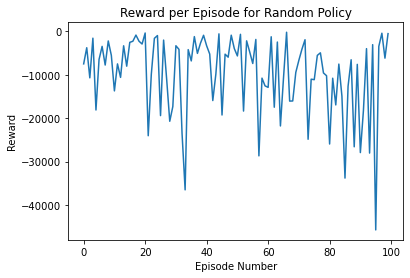

In [14]:
#plot the reward for each episode - random policy
plt.plot(rand_episode_reward_list)
plt.ylabel('Reward')
plt.xlabel('Episode Number')
plt.title("Reward per Episode for Random Policy")
plt.show()